# Exploratory Data Analysis

In [1]:
#Loading libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

#Loading datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


# Filtering Data Analyst roles for country India


In [2]:
df_ind_da = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

## location which have most job postings

In [3]:
df_loc = df_ind_da['job_location'].value_counts().head(10).to_frame()
df_loc

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


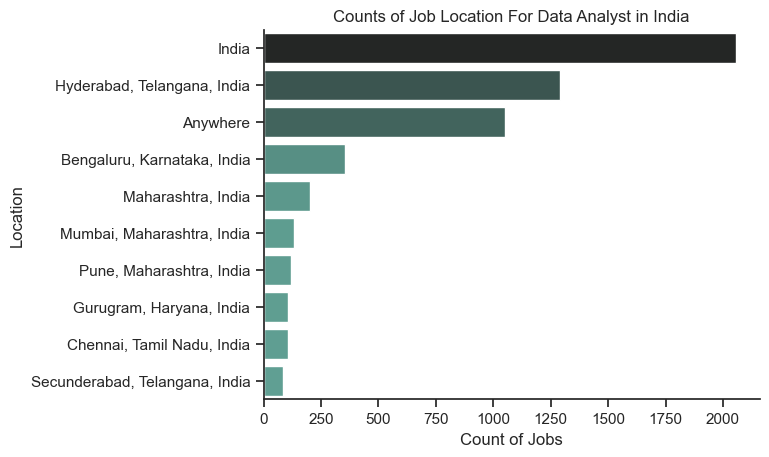

In [4]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.barplot(data=df_loc, x='count', y='job_location', hue='count', palette="dark:#5A9_r", legend=False)
sns.despine
plt.title('Counts of Job Location For Data Analyst in India')
plt.xlabel('Count of Jobs')
plt.ylabel('Location')
plt.show()

## Exploring the boolean value columns

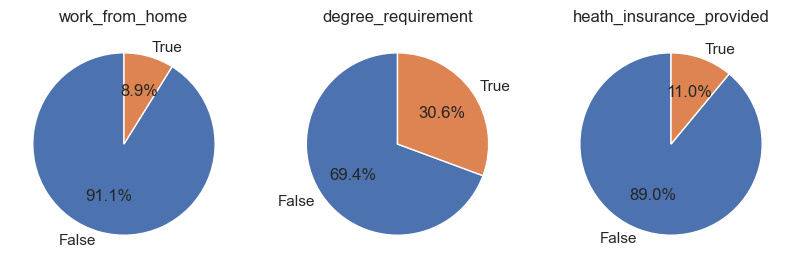

In [5]:
dict_colum ={
    'job_work_from_home': 'work_from_home',
    'job_no_degree_mention': 'degree_requirement',
    'job_health_insurance' : 'heath_insurance_provided'           
 }

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(10,5)

for i , (column ,title ) in enumerate(dict_colum.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


In [6]:
df_ind_da['job_work_from_home'].value_counts()#used this to lable true and false

job_work_from_home
False    5069
True     1052
Name: count, dtype: int64

## Top companies that have Data Analyst job postings

In [7]:
df_cp = df_ind_da['company_name'].value_counts().head(10).to_frame()

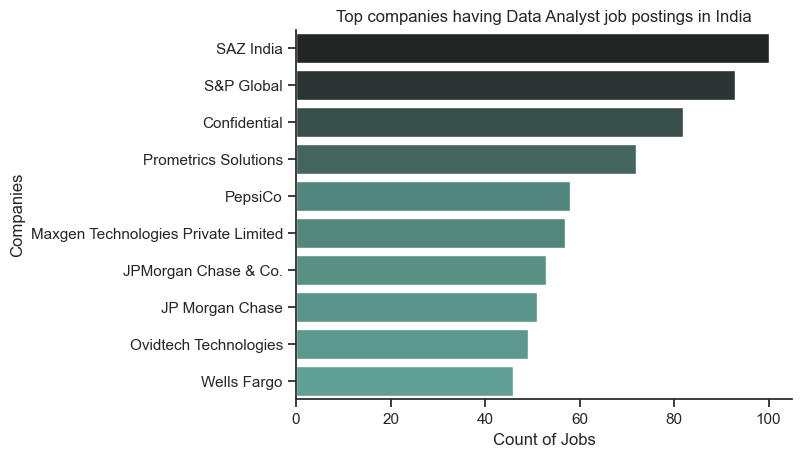

In [8]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
df_cp = df_ind_da['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_cp, x='count', y='company_name', hue='count', palette="dark:#5A9_r", legend=False)
sns.despine
plt.title('Top companies having Data Analyst job postings in India')
plt.xlabel('Count of Jobs')
plt.ylabel('Companies')
plt.show()

## Absolute Highest Paying data Jobs

In [9]:
#filter for india
df_ind = df[df['job_country'] == 'India']

#remove na values from salary year avg column
df_notna = df_ind[df_ind['salary_year_avg'].notna()].copy()

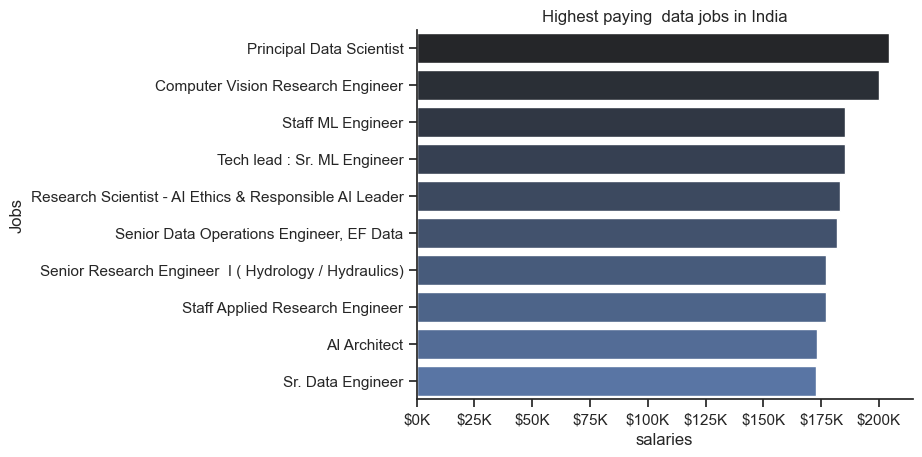

In [10]:
df_top_jobs = df_notna.groupby('job_title')['salary_year_avg'].mean().reset_index()
df_top_jobs = df_top_jobs.sort_values(by='salary_year_avg', ascending=False).head(10)
fig, ax = plt.subplots()

sns.barplot(data=df_top_jobs, x='salary_year_avg', y='job_title' , hue='job_title', palette='dark:b')
plt.xlabel('salaries')
plt.ylabel('Jobs')
plt.title('Highest paying  data jobs in India')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/1000:,.0f}K'))
plt.show()

## Most paying Data Jobs

In [41]:
df = df[df['salary_year_avg'].notna()]
df_jobs = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).reset_index()
df_jobs.columns = ['job_title_short', 'salary_year_avg']

<function matplotlib.pyplot.show(close=None, block=None)>

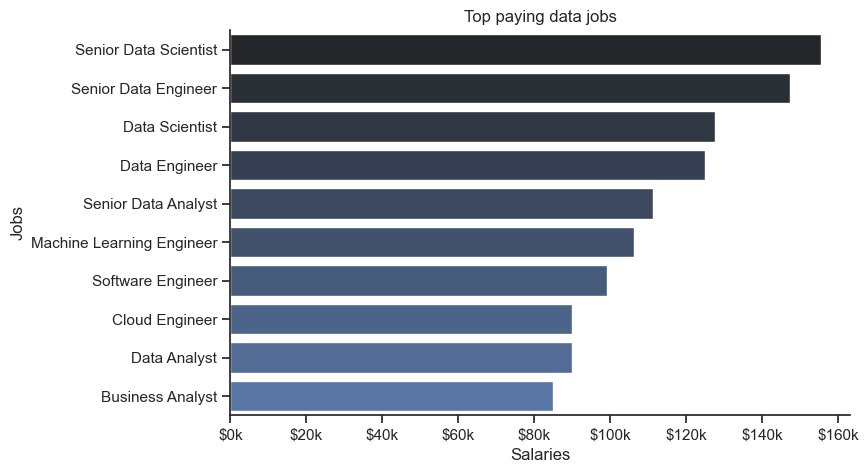

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=df_jobs, x='salary_year_avg', y='job_title_short', ax=ax, hue='job_title_short', palette='dark:b')
plt.title('Top paying data jobs')
plt.ylabel('Jobs')
plt.xlabel('Salaries')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos : f'${x/1000:,.0f}k'))

plt.show

